In [1]:
import pandas as pd

In [2]:
jar = pd.read_csv('fuel_swelling_5-grains_no-fitting.csv')

In [3]:
jar

,Grain-size-ratio index,Grain Size (um),Operation Days,Heat Flux (W/cm2),Fission Rate (10^14 f/cm3/s),Coolant init Temp (C),Fuel Temp (C),Fission Density (10^21 f/cm3),Fuel Swelling (%),Fuel Gas Swelling (%)
0,1,1.34,3,80.0,2,60,82.434301,0.05184,0.220850,0.013490
1,1,1.34,4,80.0,2,60,82.435988,0.06912,0.311495,0.035015
2,1,1.34,5,80.0,2,60,82.443824,0.08640,0.413397,0.067797
3,1,1.34,6,80.0,2,60,82.446168,0.10368,0.525515,0.110795
4,1,1.34,7,80.0,2,60,82.448867,0.12096,0.646617,0.162777
...,...,...,...,...,...,...,...,...,...,...
22741,5,34.00,77,400.0,10,120,210.000096,6.65280,50.985029,24.373829
22742,5,34.00,78,400.0,10,120,210.277457,6.73920,52.050844,25.094044
22743,5,34.00,79,400.0,10,120,210.468522,6.82560,53.466086,26.163686
22744,5,34.00,80,400.0,10,120,210.763922,6.91200,54.909245,27.261245


In [7]:
jar['Fission Rate (10^14 f/cm3/s)'].unique()

array([ 2,  4,  6,  8, 10])

In [8]:
jar['Coolant init Temp (C)'].unique()

array([ 60,  75,  88, 105, 120])

In [9]:
jar['Heat Flux (W/cm2)'].unique()

array([ 80., 160., 240., 320., 400.])

In [11]:
tra = jar.loc[(jar['Heat Flux (W/cm2)'] == 240.0)
            & (jar['Fission Rate (10^14 f/cm3/s)'] == 6)
            & (jar['Coolant init Temp (C)'] == 88)]

In [14]:
len(tra)

665

In [21]:
jar['Grain Size (um)'].unique()

array([ 1.34,  4.36,  8.5 , 17.  , 34.  ])

In [22]:
tra1 = tra.loc[tra['Grain Size (um)'] == 1.34]
tra2 = tra.loc[tra['Grain Size (um)'] == 4.36]
tra3 = tra.loc[tra['Grain Size (um)'] == 8.5]
tra4 = tra.loc[tra['Grain Size (um)'] == 17.0]
tra5 = tra.loc[tra['Grain Size (um)'] == 34]

In [15]:
import matplotlib.pyplot as plt

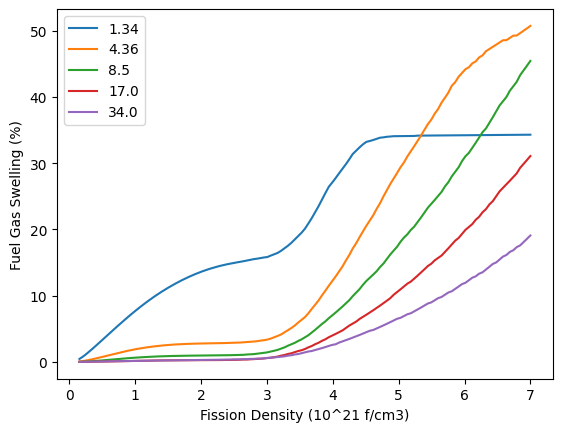

In [23]:
plt.plot(tra1['Fission Density (10^21 f/cm3)'], tra1['Fuel Gas Swelling (%)'], label='1.34')
plt.plot(tra2['Fission Density (10^21 f/cm3)'], tra2['Fuel Gas Swelling (%)'], label='4.36')
plt.plot(tra3['Fission Density (10^21 f/cm3)'], tra3['Fuel Gas Swelling (%)'], label='8.5')
plt.plot(tra4['Fission Density (10^21 f/cm3)'], tra4['Fuel Gas Swelling (%)'], label='17.0')
plt.plot(tra5['Fission Density (10^21 f/cm3)'], tra5['Fuel Gas Swelling (%)'], label='34.0')
plt.xlabel('Fission Density (10^21 f/cm3)')
plt.ylabel('Fuel Gas Swelling (%)')
plt.legend()
plt.show()

In [24]:
tra.to_csv('nominal_set.csv')

In [26]:
import numpy as np

In [25]:
def fn(x, A, a, B, b, c, d, g, h):
    fd, D = x
    f1 = A * (1 - np.exp(-b * fd))
    f2 = B * np.exp(-b * D)
    f3 = c * np.log(D**d) / (1 + np.exp(-g*fd + h))
    return f1 * f2 + f3

In [27]:
from scipy.optimize import curve_fit

In [32]:
popt, pcov = curve_fit(fn,
                       (jar['Fission Density (10^21 f/cm3)'], jar['Grain Size (um)']),
                       jar['Fuel Gas Swelling (%)'],
                       bounds=(0, 30))

In [33]:
popt

array([ 8.61472383, 27.93568586,  8.60649386,  0.10296916,  2.76489   ,
        2.75402087,  2.02318102, 11.8004789 ])

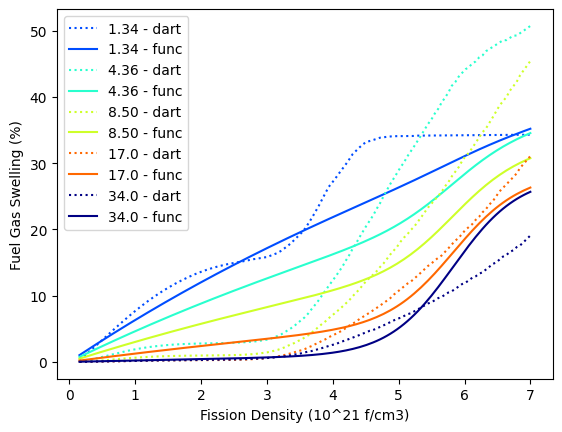

In [34]:
for tra, yeet, col in zip([tra1, tra2, tra3, tra4, tra5], ['1.34', '4.36', '8.50', '17.0', '34.0'], [0.2, 0.4, 0.6, 0.8, 1]):
    X_test_p = (tra['Fission Density (10^21 f/cm3)'], tra['Grain Size (um)'])
    y_pred_p = fn(X_test_p, *popt)
    plt.plot(tra['Fission Density (10^21 f/cm3)'].values, tra['Fuel Gas Swelling (%)'], color=plt.cm.jet(col), ls=':', label=f'{yeet} - dart')
    plt.plot(tra['Fission Density (10^21 f/cm3)'].values, y_pred_p, color=plt.cm.jet(col), label=f'{yeet} - func')

plt.xlabel('Fission Density (10^21 f/cm3)')
plt.ylabel('Fuel Gas Swelling (%)')
plt.legend()
plt.show()